In [70]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from pathlib import Path
pathing = "C:/Users/Bricks/PycharmProjects/Projects/Black_friday/Input"
end_pathing = "C:/Users/Bricks/PycharmProjects/Projects/Black_friday/Output"
filename = "BlackFriday.csv"

# Any results you write to the current directory are saved as output.

plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [71]:
df = pd.read_csv(Path(pathing) / filename)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [20]:
df
## Looks like we have some null/NaN values in the product categories.

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


<b>Analyzing data for research</b>
 1. Who is more likely to spend more in a black Friday sale?
     - Men or Women.
     - Married or Un Married
     - Old Residents or new residents 
 2. Which type of products are more likely to be sold in a sale like black Friday?
 3. Which type of products are common among men and which among women? <br>
 
<b>Prediction/classification</b>
1. Predict Age of a customer based on the rest of available data.
2. Predict gender of a customer based on rest of data.
3. Predict amount of purchase based on rest of data. <br>

<b>Recommendation</b>
1. Suggest products based on age.
2. Suggest products based on location customers belong to.
3. Suggest products based on gender.


In [101]:
## to check which columns have null values.
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

<b>Investigate Prod_Cat_2 and Prod_Cat_3</b>

In [22]:
print('Product_Category_2', sorted(df['Product_Category_2'].unique()))
print('Product_Category_3', sorted(df['Product_Category_3'].unique()))

Product_Category_2 [nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
Product_Category_3 [nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


In [23]:
# product Id and user Id seems useless
# df.drop(columns = ["User_ID","Product_ID"],inplace=True)

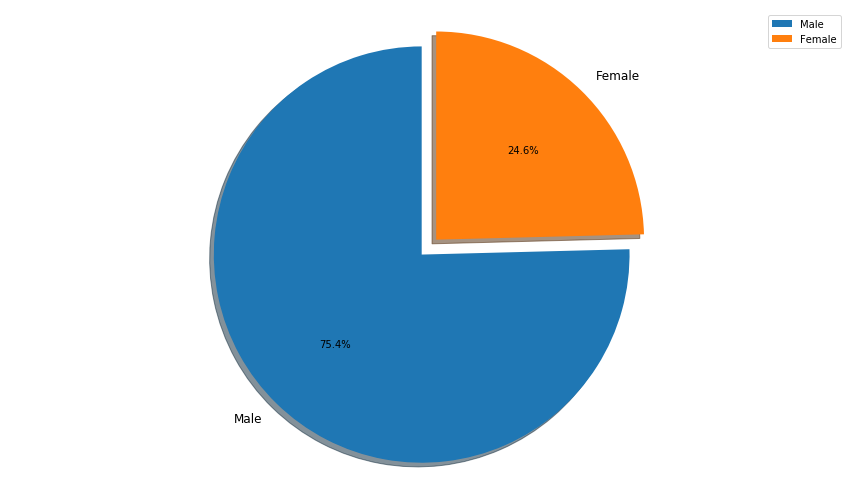

In [33]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

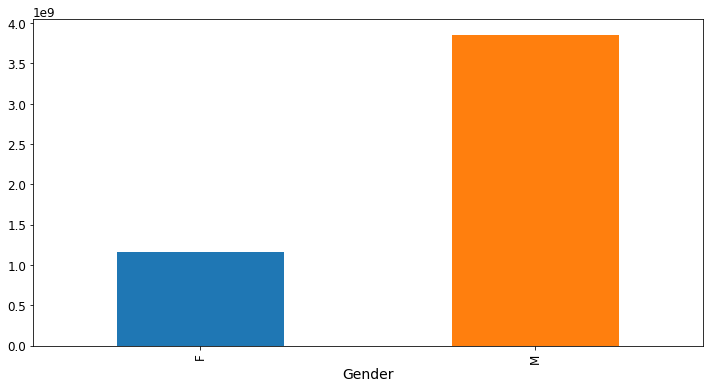

In [36]:
# y-axis in billions
def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    df.groupby(group)[column].sum().sort_values().plot(plot)
    
plot('Gender','Purchase','bar')

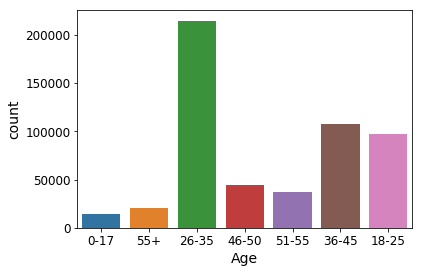

In [25]:
sns.countplot(df['Age'])

Further, I could also check among the age groups, which gender was a majority by adding a hue. And as seen below, more males spent in the sale than females.

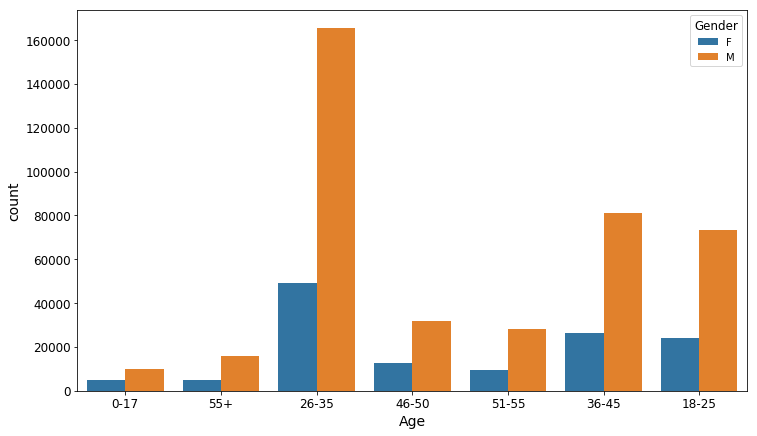

In [37]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['Age'],hue=df['Gender'])

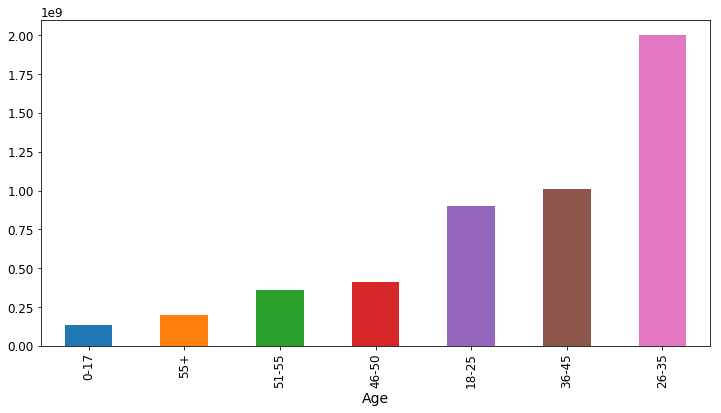

In [39]:
# y-axis in billions
plot('Age','Purchase','bar')

Obviously, we can consider that the target age group of our stores is the age group of 26-35 years, we have achieved sales of more than 3 billion in the age group of 26-45 years

May be we could check further - how many of these males were actually married? For this lets create a column that represents gender+married status and then use it as hue.May be we could check further - how many of these males were actually married? For this lets create a column that represents gender+married status and then use it as hue.

In [27]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


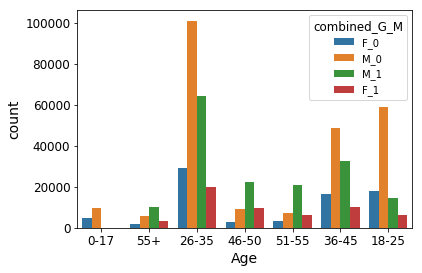

In [28]:
sns.countplot(df['Age'],hue=df['combined_G_M'])

As we see above, there are no bars for the married in the 0-17 range which makes sense. And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.

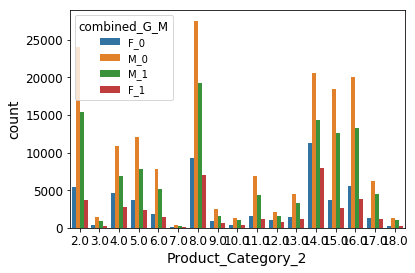

In [29]:
sns.countplot(df['Product_Category_2'],hue=df['combined_G_M'])

Even below plots don't provide any hint of whether some products are particularly being purchased by either females or married males.

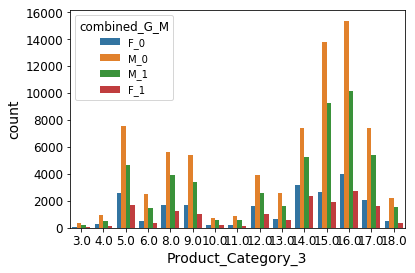

In [30]:
sns.countplot(df['Product_Category_3'],hue=df['combined_G_M'])

In [31]:
df_by_occupation_and_categories = df.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')

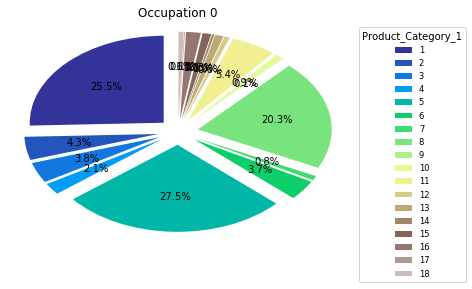

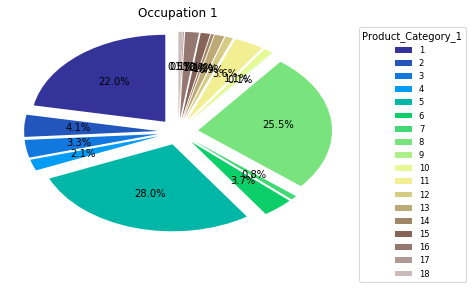

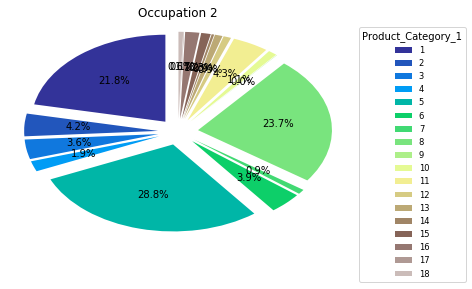

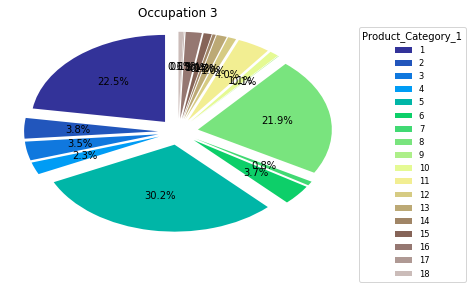

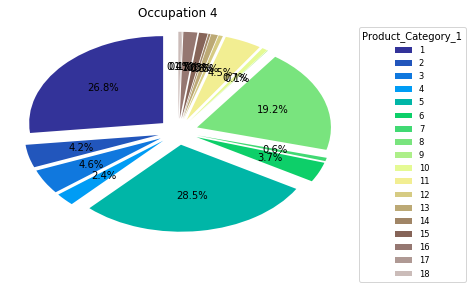

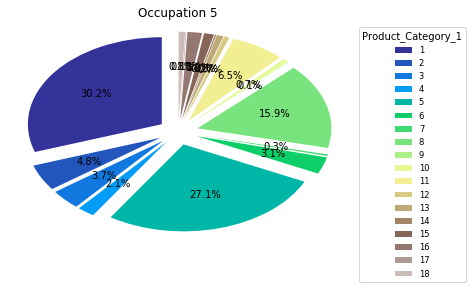

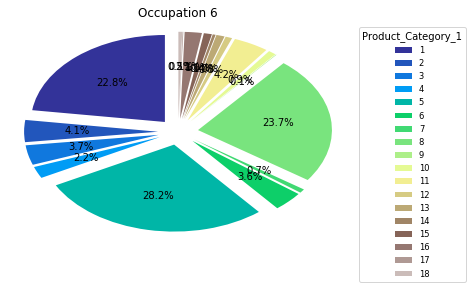

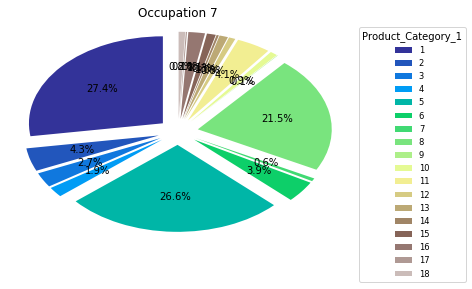

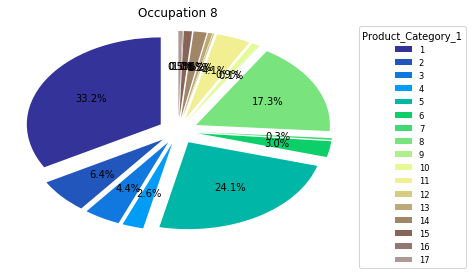

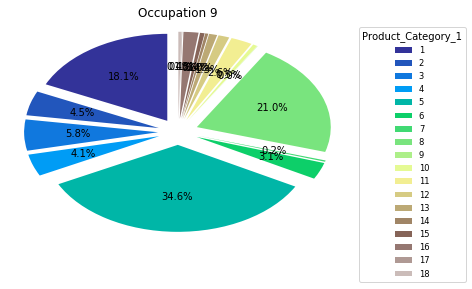

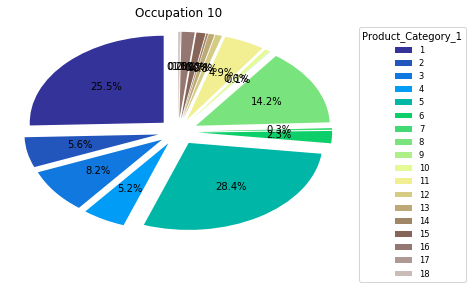

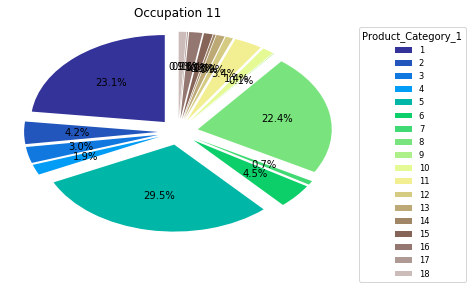

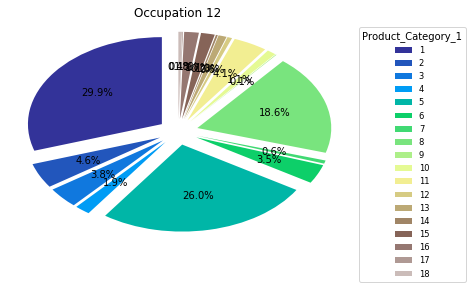

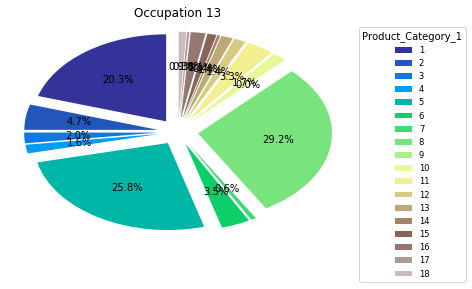

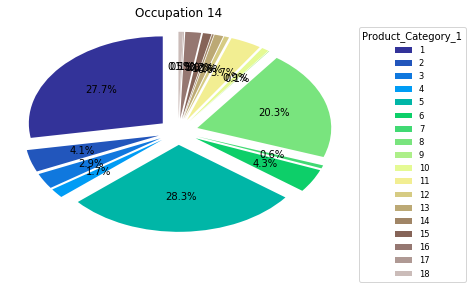

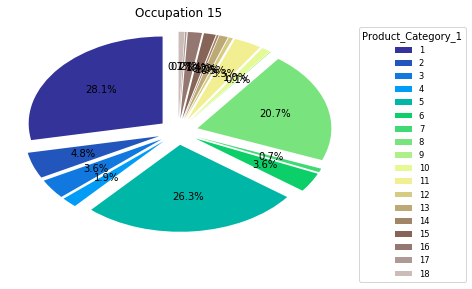

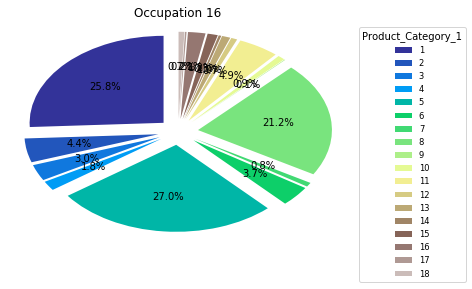

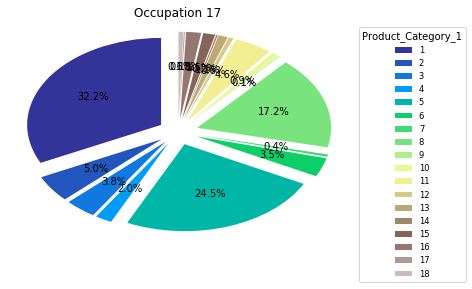

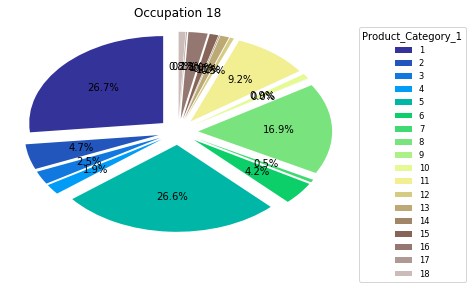

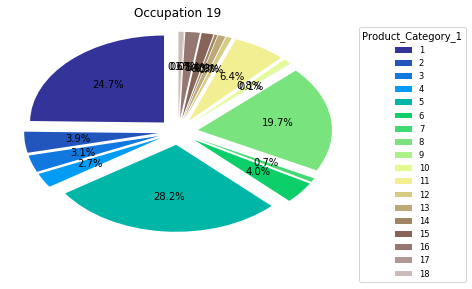

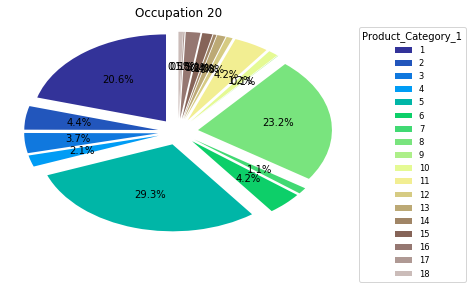

In [32]:
fig = plt.figure()
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
cmap = plt.get_cmap('terrain')
colors = [cmap(i) for i in np.linspace(0, 1, 20)]
plotFor = "Occupation {0}"
title = 'Product_Category_1'
for i in range(21):
    explode = [0.15 for i in range(len(df_by_occupation_and_categories['Gender'][i].get_values()))]
    a = plt.pie(df_by_occupation_and_categories['Gender'][i].get_values(), radius=1, colors=colors,startangle=90,autopct='%1.1f%%',explode=explode)
    plt.legend(df_by_occupation_and_categories['Product_Category_1'][0].get_values(),loc='upper center',prop=fontP, bbox_to_anchor=(1.2, 1),title=title)
    plt.title(plotFor.format(i))
    plt.show()
## We can use tableau as well to create better charts.

Couple of observations from above charts:
- Irrespective of occupation the proportion of products being purchased is generic. i.e. category 1, 5 are most bought by customers of any occupation and similary, 13-18 categories are bought in less numbers compared to other products.
- If we look at category 1, it is most bought by customers with 8, 17, 5 occupations. This can be used when recommending a product on a platform where occupation of user is known. Similar observation can be done for other categories. Specially when we don't actually know what those categories represent, such relation can help understand user purchasing patterns based on an known attribute (e.g. occupation).



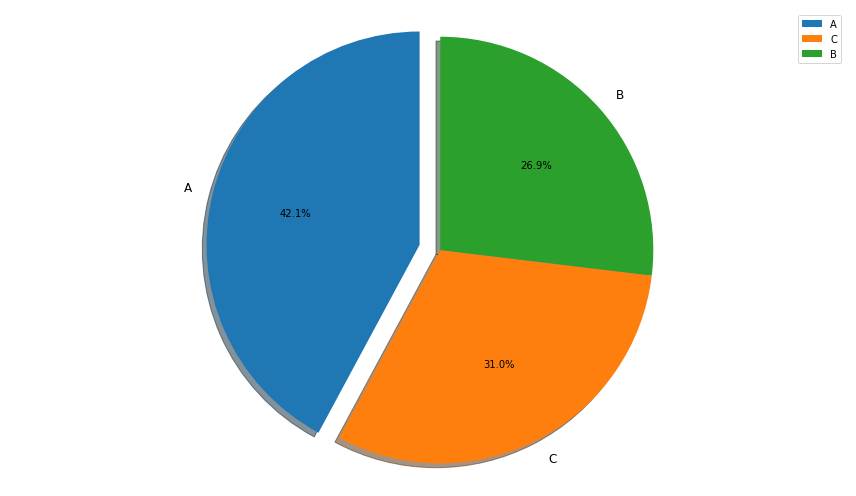

In [46]:
# City count
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['City_Category'].value_counts(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

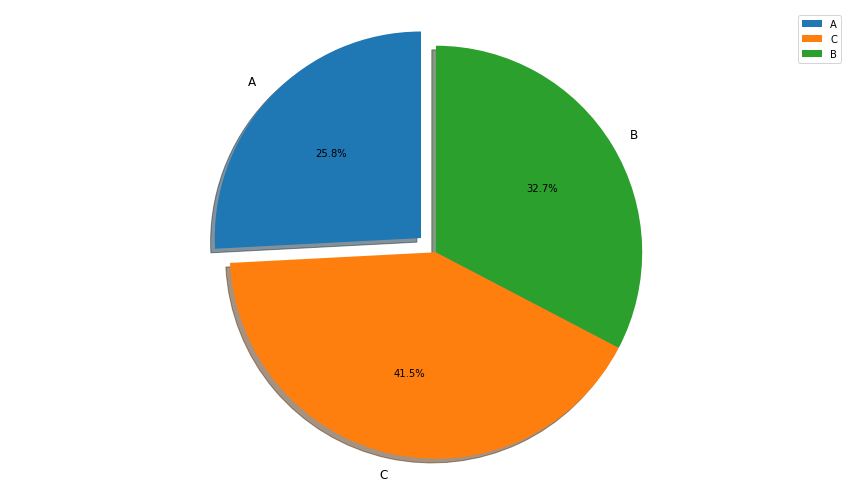

In [47]:
# Sum of ammount $ in percentages 
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('City_Category')['Purchase'].sum(),explode=explode, labels=df['City_Category'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

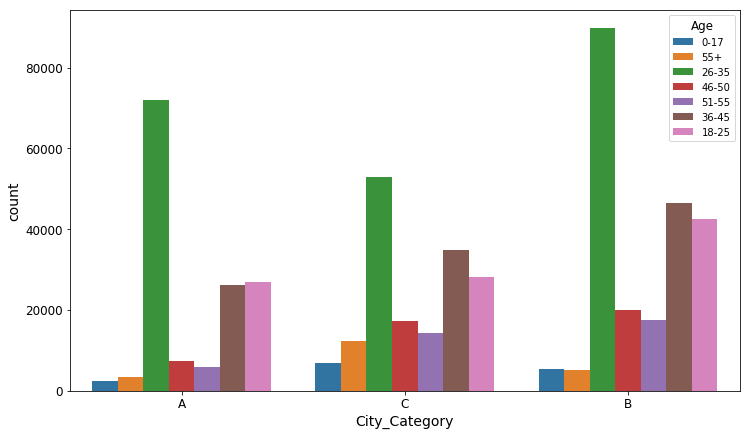

In [44]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df['City_Category'],hue=df['Age'])

<b>

Unexpectedly, the highest sales do not come in the number of purchases, people from Area B have a greater purchasing power than others, and greater sales gained from people from Area C
</b>

 I would like to point out that sales do not reflect purchasing power, but the number of attendees reflects purchasing power because the data are individual sales. sales in the city, it reflects the purchasing power ..

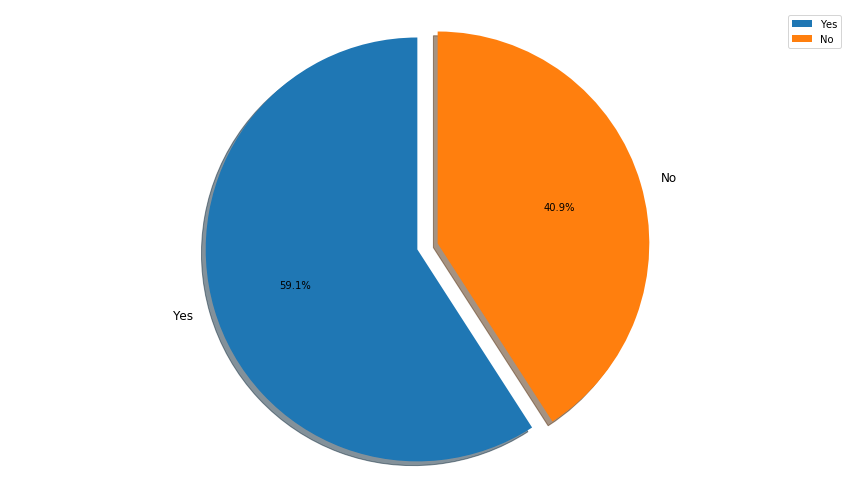

In [49]:
# Married?
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Marital_Status'].value_counts(),explode=explode, labels=['Yes','No'], autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

<b>

City A is the most cities followed by B and then C, the distribution of ages on the procurement map is very close, we have to focus on that category of work averages of 36-45

Most of our customers are more than 60% married, I see that the strategy of targeting families to ensure more clients succeed
</b>

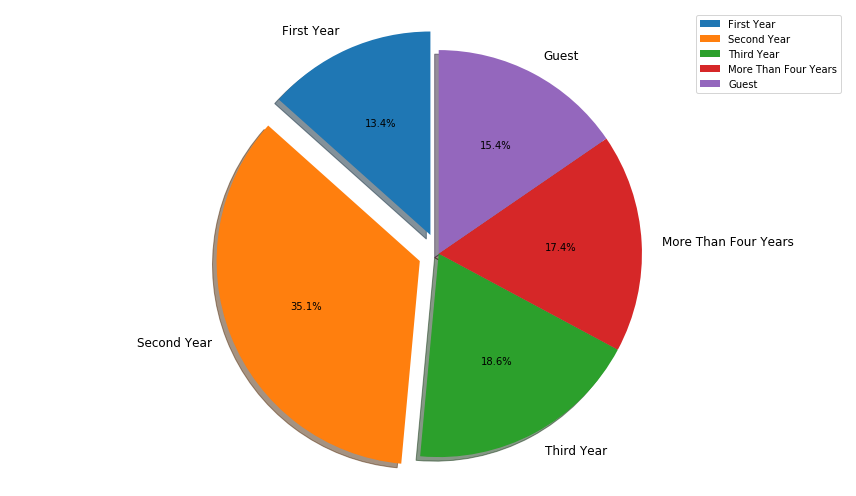

In [60]:
# Years stayed in the city with Sum of ammount $ in percentages
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

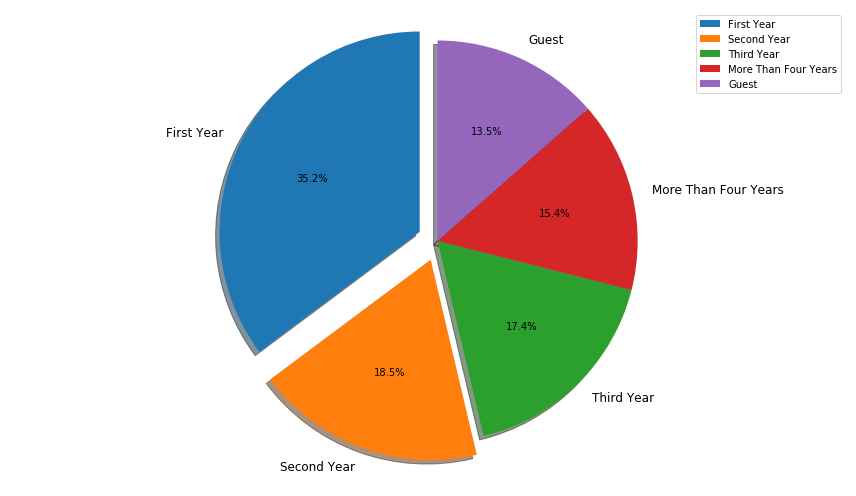

In [56]:
# Years stayed in city counts
labels=['First Year','Second Year','Third Year','More Than Four Years','Guest']
#label=['Underage 0-17','Retired +55','Middleage 26-35','46-50 y/o','Oldman 51-55','Middleage+ 36-45','Youth']
explode = (0.1, 0.1,0,0,0)
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Stay_In_Current_City_Years'].value_counts(),explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

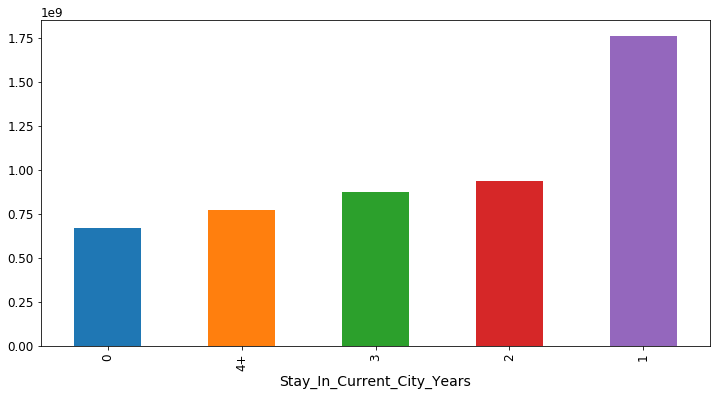

In [58]:
# y-axis in billions
plot('Stay_In_Current_City_Years','Purchase','bar')


<b>
We have worked hard in the past two years and have achieved a large percentage of sales from the new population of cities, but these figures indicate that the older city dwellers have less passion for our products. I do not know in fact look at it for yourselves why old city dwellers did not achieve higher sales of the population New visitors or visitors from outside the city?
We have almost gained about 1.75 billion new city residents only!
</b>

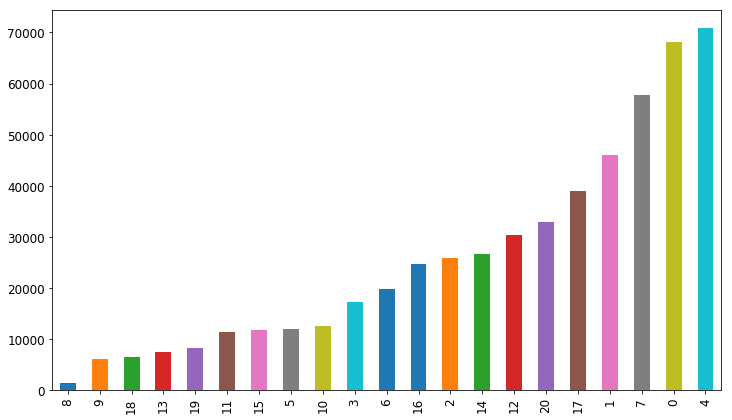

In [62]:
# Occupation
fig1, ax1 = plt.subplots(figsize=(12,7))
df['Occupation'].value_counts().sort_values().plot('bar')

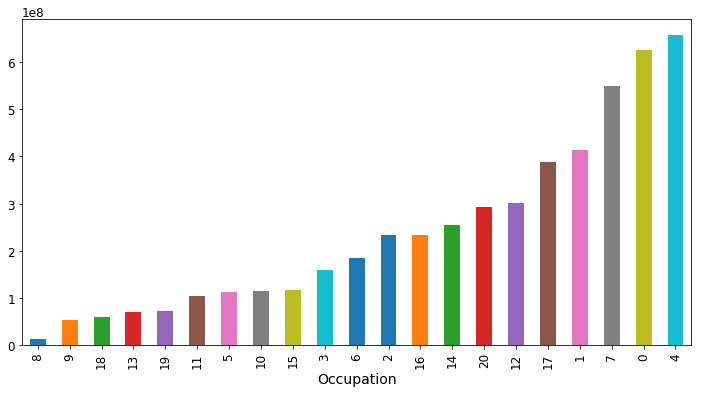

In [63]:


plot('Occupation','Purchase','bar')



<b>

We also note here that purchasing power is closely related to the Occupation in some cases as the first class of the table but there are some differences we will notice when checking the number of purchases and the value of those purchases total
</b>

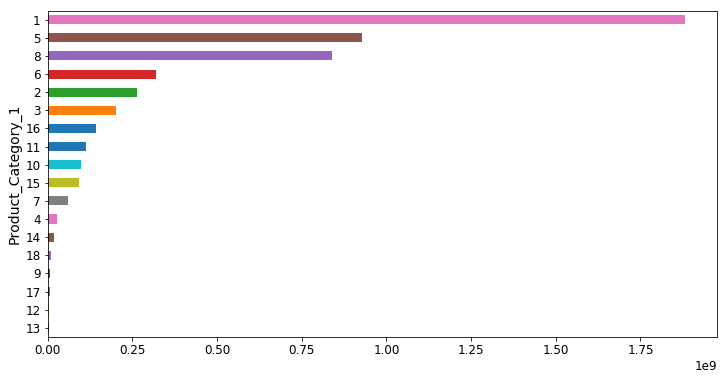

In [66]:
# products and categories
plot('Product_Category_1','Purchase','barh')

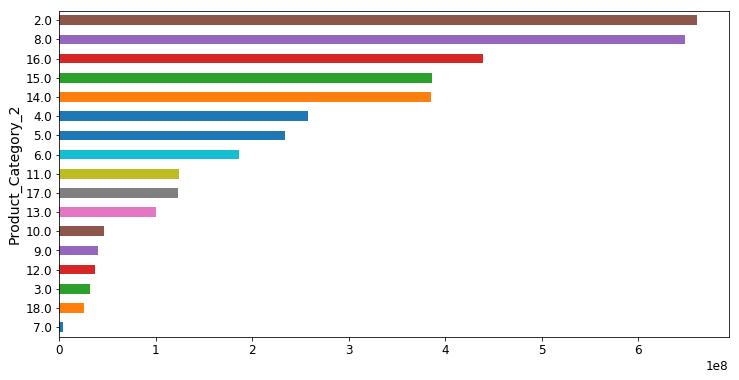

In [67]:
plot('Product_Category_2','Purchase','barh')

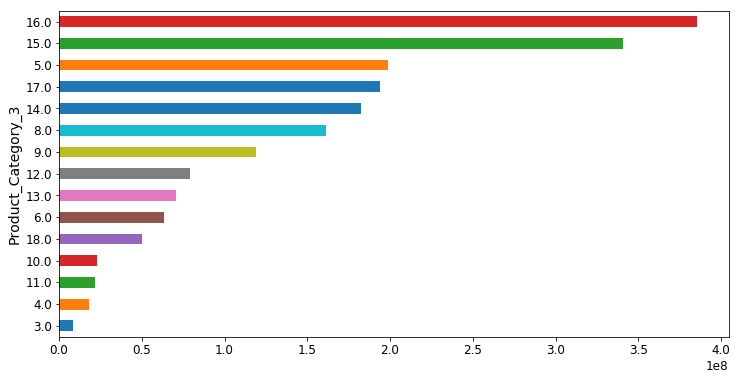

In [68]:
plot('Product_Category_3','Purchase','barh')

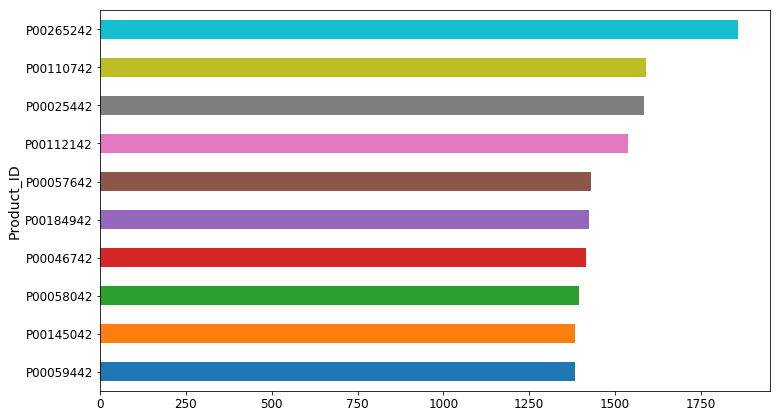

In [73]:


fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Purchase'].count().nlargest(10).sort_values().plot('barh')



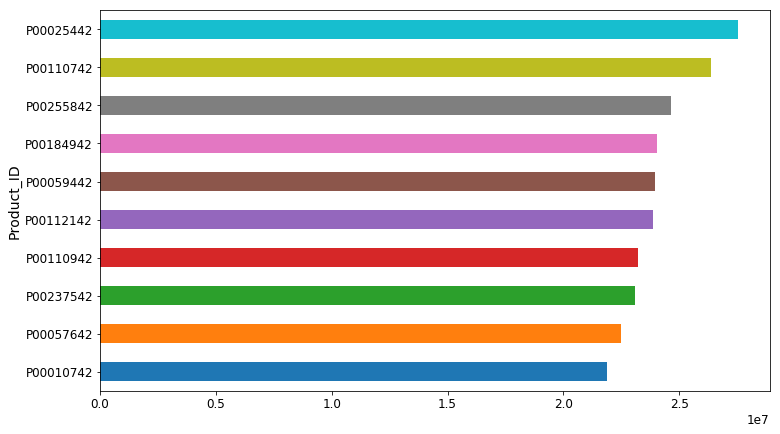

In [74]:
fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot('barh')

<b>

Well, now we have the top 10 products for the top 10 profits , and first 10 category for each products .
Remember that I may have been explored, but this is where your next task begins. The goal of this kernel is to teach you how to analyze how to compare things to each other, How to add information you can tell yourself and tell the stakeholders.
</b>



It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

    Product_Category_1 has a negative correlation with Purchase.
    Maritial_Status and Age are strongly correlated. As Expected.
    Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.



# Part 2

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [105]:
df = pd.read_csv(Path(pathing) / filename)

In [106]:
print('<Contain NaNs?>')
print(df.isnull().any())
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

<Contain NaNs?>
User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

<NaN ratio>
Product_Category_3    69
Product_Category_2    31
Name: missing values %, dtype: float64


In [107]:
df.fillna(0,inplace=True)

In [108]:
for col in df.columns:
    print('{} unique element: {}'.format(col,df[col].nunique()))

User_ID unique element: 5891
Product_ID unique element: 3623
Gender unique element: 2
Age unique element: 7
Occupation unique element: 21
City_Category unique element: 3
Stay_In_Current_City_Years unique element: 5
Marital_Status unique element: 2
Product_Category_1 unique element: 18
Product_Category_2 unique element: 18
Product_Category_3 unique element: 16
Purchase unique element: 17959




This dataset has 537577 entries with 12 columns. It is a lot of data (~half million) that contains customer-specific (User_ID) and product-specific (Product_ID,Product_Category_1,Product_Category_2,Product_Category_3) information. The unique User_ID and Product_ID are ~5900 and ~3600, respectively. They are quite small compared to the total number of entries, therefore, it can be inferred that a great portion of User_ID and Product_ID repeat many times and they may contain crucial information. However, these information are only available when the target variable, Purchase, is determined at the cashier. Therefore, training the data using these information may cause undersirable data leakage depending on the goal of the project. The store may want to predict Purchase soley based on the low-level information (i.e. Gender, Age, etc) so that they can reflect those in their marketing strategies that target new customers.

In this project, both cases will be considered and two separate models will be trained for comparison.

    Case 1: Training with all features (including customer- and product- specific information)
    Case 2: Training with low-level features only

A brief investigation revealed that ~31% and ~69% data are NaNs in Product_Category_2 and Product_Categroy_3, respectively. As the datatype of Product_Category_1 is int, these NaNs were filled with 0.

Lastly, it should be noted that most features are categorical.


Text(0,0.5,'Count')

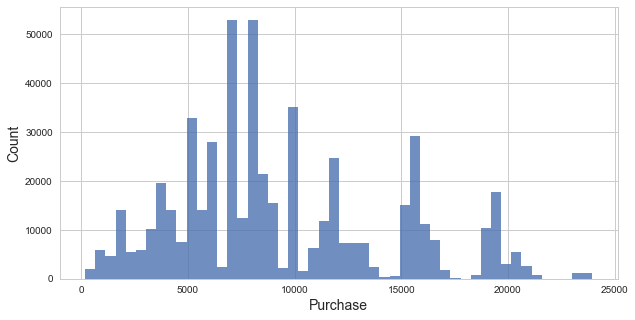

In [109]:

#Purchase distribution

plt.figure(figsize=(10,5))
plt.hist(df['Purchase'],bins=50, alpha=0.8)
plt.xlabel('Purchase',fontsize=14)
plt.ylabel('Count',fontsize=14)





The target varaible is slightly right skewed, but looks more or less like normal.



([], <a list of 0 Text xticklabel objects>)

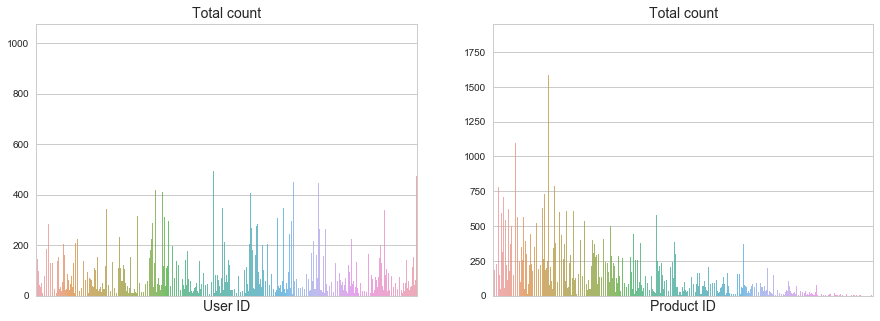

In [110]:
# Distributions of User_ID and Product_ID
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot('User_ID',data=df,alpha = 0.8)
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])
plt.subplot(122)
sns.countplot('Product_ID',data=df,alpha = 0.8)
plt.xlabel('Product ID',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])

These distributions shows that if the model is trained for these customer- and product-specific information, it will help predicting Purchase. This can be seen in more detail in the figures below.

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

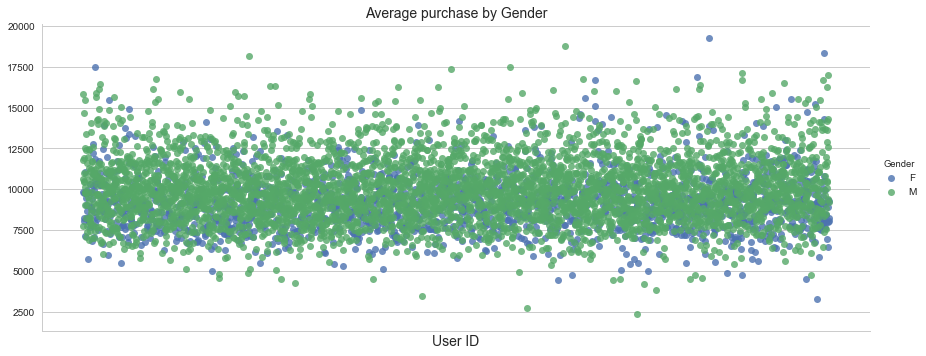

<Figure size 1440x360 with 0 Axes>

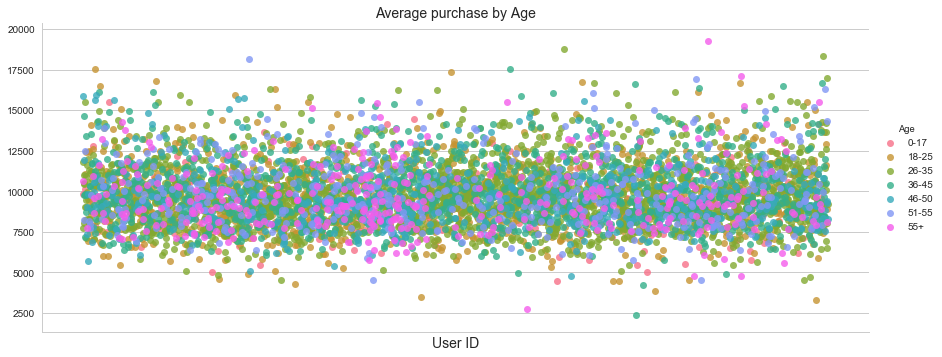

In [111]:
# Average purchase by User_ID
df_Apurchase_by_UID_Gender = df.groupby(['User_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_UID_Age = df.groupby(['User_ID','Age']).agg({'Purchase':np.mean}).reset_index()
age_order = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('User_ID','Purchase',data=df_Apurchase_by_UID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('User ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

Text(0.5,1,'Average purchase by Age')

<Figure size 1440x360 with 0 Axes>

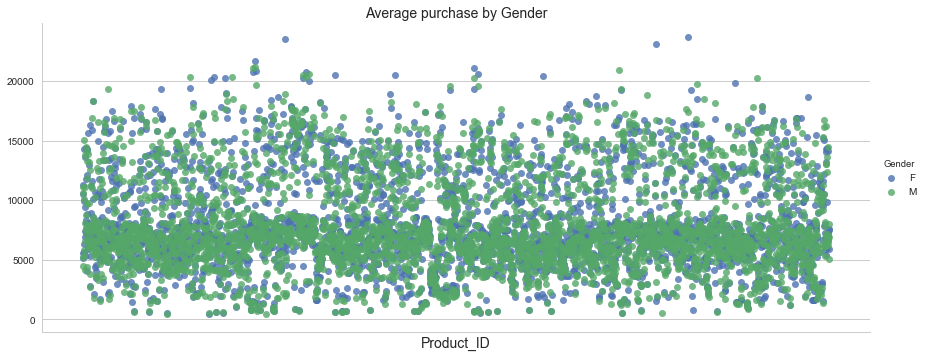

<Figure size 1440x360 with 0 Axes>

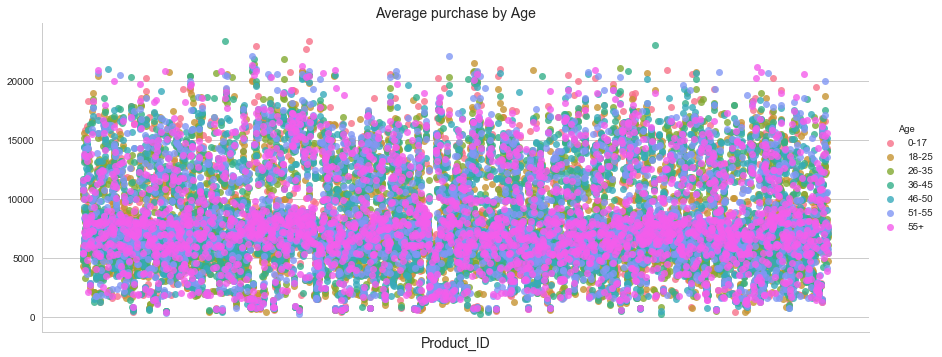

In [112]:
# Average purchase by Product_ID
df_Apurchase_by_PID_Gender = df.groupby(['Product_ID','Gender']).agg({'Purchase':np.mean}).reset_index()
le_P_ID = LabelEncoder()
df_Apurchase_by_PID_Gender['Product_ID'] = le_P_ID.fit_transform(df_Apurchase_by_PID_Gender['Product_ID'])
df_Apurchase_by_PID_Age = df.groupby(['Product_ID','Age']).agg({'Purchase':np.mean}).reset_index()
df_Apurchase_by_PID_Age['Product_ID'] = le_P_ID.fit_transform(df_Apurchase_by_PID_Age['Product_ID'])

plt.figure(figsize=(20,5))
sns.lmplot('Product_ID','Purchase',data=df_Apurchase_by_PID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('Product_ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('Product_ID','Purchase',data=df_Apurchase_by_PID_Age,fit_reg=False,hue='Age',hue_order=age_order,aspect=2.5)
plt.xticks([])
plt.xlabel('Product_ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Age',fontsize=14)

Certainly, specific users and products are contributing more in terms of Purchase. Based on these figures, Product_ID seems to have stronger predictive power than User_ID.

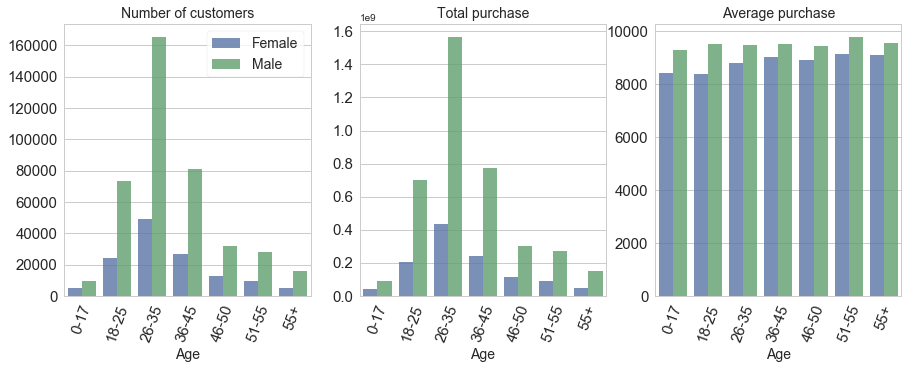

In [113]:
# Count/Purchase by Age by Gender
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('Age',order=age_order,hue='Gender',data=df,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Number of customers',fontsize=14)
plt.legend(['Female','Male'],frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(132)
df_Tpurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Tpurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Total purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_Age = df.groupby(['Age','Gender']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('Age','Purchase',hue='Gender',data=df_Apurchase_by_Age,alpha = 0.8)
plt.xlabel('Age',fontsize=14)
plt.ylabel('')
plt.xticks(rotation=70)
plt.title('Average purchase',fontsize=14)
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)



In both gender, the age group that purchased most was [26-35]. The total number of customers who made transactions and their total purchase amount were very strongly correlated. This was well reflected in the thrid subplot where the average purchase appeared to be very similiar in all different age groups. In other words, the total purchase of [26-35] was the most simply because there were more customers in that age group. This may mean that Age may not be a strong predictor for Purchase. However, Gender may be helpful as it was clear that Male spent more than Female.

Assuming the Gender ratio to be simliar in each city, different city may have different occupation distribution. If that is the case, the city that the customer comes from may be a strong predictor for Purchase as customers with certain occupations may spend more during shopping.


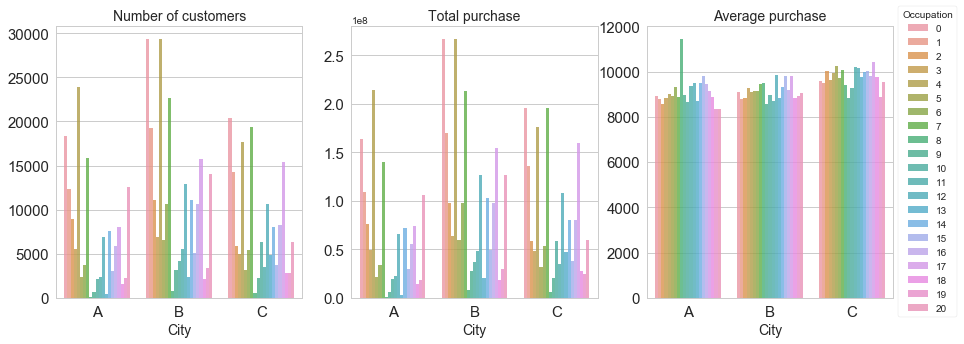

In [114]:
# Count/Purchase by City by Occupation
city_order = ['A','B','C']
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot('City_Category',order=city_order,hue='Occupation',data=df,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.title('Number of customers',fontsize=14)
plt.subplot(132)
df_Tpurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Tpurchase_by_City,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)
plt.subplot(133)
df_Apurchase_by_City = df.groupby(['City_Category','Occupation']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('City_Category','Purchase',hue='Occupation',data=df_Apurchase_by_City,alpha = 0.8)
plt.title('Average purchase',fontsize=14)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=15)



However, in each city, the occupation distribution was quite similar. As observed in the age distribution above, the number of customers and total purchase amounts from customers in different occupations in each city showed strong correlation. This was also well reflected in the last subplot where the average purchase was similiar in all different groups of consideration. One thing to be noted was that the average purchase of customers with Occupation #8 from City A showed distinctively high average purchase.

Other features can also be investigated in terms of Purchase.


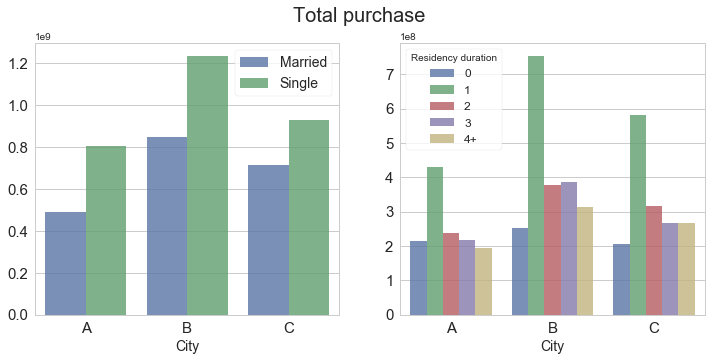

In [115]:
# Purchase by City by Marrital status and Residency duration
df['Marital_Status_label']=np.where(df['Marital_Status'] == 0,'Single','Married')
df_Tpurchase_by_City_Marital = df.groupby(['City_Category','Marital_Status_label']).agg({'Purchase':np.sum}).reset_index()
df_Tpurchase_by_City_Stay = df.groupby(['City_Category','Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
fig.suptitle('Total purchase',fontsize=20)
plt.subplot(121)
sns.barplot('City_Category','Purchase',hue='Marital_Status_label',data=df_Tpurchase_by_City_Marital,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(frameon=True,fontsize=14)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('City_Category','Purchase',hue='Stay_In_Current_City_Years',data=df_Tpurchase_by_City_Stay,alpha = 0.8)
plt.xlabel('City',fontsize=14)
plt.ylabel('')
plt.legend(title='Residency duration',frameon=True,fontsize=12,loc=2)
plt.tick_params(labelsize=15)
df.drop('Marital_Status_label',axis=1,inplace=True)



It was shown that unmarried customers spent more than the married. Customers who lived in their city for 1 year tent to spend more than other groups.

Also, it would be interesting to find the Product_Category_1 that was the most famous.

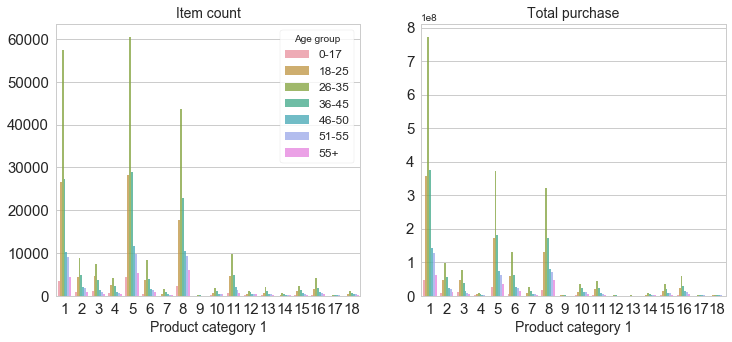

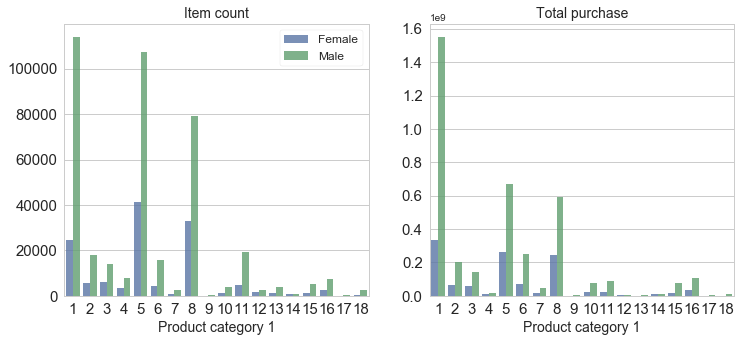

In [116]:
# Count/Purchase by Product_Category_1 by Age and Gender
df_Tpurchase_by_PC1_Age = df.groupby(['Product_Category_1','Age']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Age',data=df,alpha = 0.8,hue_order=age_order)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(title='Age group',frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Age',data=df_Tpurchase_by_PC1_Age,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)

df_Tpurchase_by_PC1_Gender = df.groupby(['Product_Category_1','Gender']).agg({'Purchase':np.sum}).reset_index()
fig = plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot('Product_Category_1',hue='Gender',data=df,alpha = 0.8)
plt.title('Item count',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend(['Female','Male'],frameon=True,fontsize=12)
plt.tick_params(labelsize=15)
plt.subplot(122)
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df_Tpurchase_by_PC1_Gender,alpha = 0.8)
plt.title('Total purchase',fontsize=14)
plt.xlabel('Product category 1',fontsize=14)
plt.ylabel('')
plt.legend().set_visible(False)
plt.tick_params(labelsize=15)



In general,

    Male shopped more than Female
    Single shopped more than Married
    Customers from City B shopped the most
    Customers who has resided in their city for 1 year shopped the most
    Product_category_1 #1,5,8 were the most selling
    Product_category_1 #1 made the most profit

These relationships between different features can be investigated further to set the new marketing strategies to maximize the profit of the retail store (possibly for the future black Fridays). For example, the retail store may consider doing more advertisements targetting their unmarried male customers in City B on product_category_1 #1.


# Feature engineering for model fitting

While the ordinal categorical features can be simply encoded with integers, the nominal categorical features need to be one-hot-encoded. In this case, however, the number of unique entires for User_ID and Product_ID is too big and one-hot-encoding these features will unnecessarily increase the data dimension and therefore cardinality. In real case, some other technique like feature hashing may be considered, but for the scope of this project where these two are being considered to be the source of data leakage, thses two features will be simply encoded with integers. Except for Gender and Marital_Status which are binary, all other nominal categorical data will be, however, one-hot-encoded.

In [117]:
le_U_ID = LabelEncoder()
df['User_ID'] = le_U_ID.fit_transform(df['User_ID'])
le_P_ID = LabelEncoder()
df['Product_ID'] = le_P_ID.fit_transform(df['Product_ID'])
df['Gender'] = np.where(df['Gender']=='M',1,0) # Female: 0, Male: 1
df_Age = pd.get_dummies(df.Age)
df_CC = pd.get_dummies(df.City_Category)
df_SIC = pd.get_dummies(df.Stay_In_Current_City_Years)
df_encoded = pd.concat([df,df_Age,df_CC,df_SIC],axis=1)
df_encoded.drop(['Age','City_Category','Stay_In_Current_City_Years'],axis=1,inplace=True)

# ML model (Random Forest) fitting (Case 1):

Since most features are discrete, Random Forest Regressor is expected to fit the data well. Since the given dataset contains ~half million entries, using all of them may cause running-time issue on my machine when trying to do some iterative works like generating the learning curve. Therefore, only the fraction (1/50) of its data (~10k) will be randomly sampled for initial ML model fitting attempts.

In [118]:
# Random sampling and train/test split
df_frac = df_encoded.sample(frac=0.02,random_state=100)
X = df_frac.drop(['Purchase'], axis=1)
y = df_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Hyperparameter selection through 3-fold cross-validation: RMSE

Best parameter: {'n_estimators': 300}
Best score: 2983.62


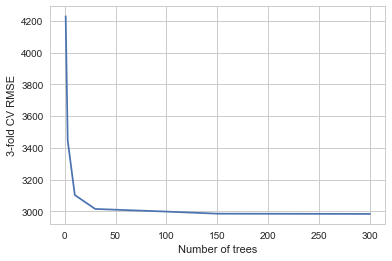

In [120]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)
plt.figure()
plt.plot(list(param_grid.values())[0],(-1*grid_rf.cv_results_['mean_test_score'])**0.5)
plt.xlabel('Number of trees')
plt.ylabel('3-fold CV RMSE')
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))



Only the number of trees used in the ensemble (n_estimators) was roughly scanned for the initial attempt. As the number of tree in RF increased, the average CV RMSE decreased. While it seemed to be saturated at n_estimators=~100, it was difficult to tell why the model was still suffering with high RMSE.

By considering max_depth, more optimized parameters can be searched up.


In [122]:
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train_scaled,y_train)

In [123]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 9, 'n_estimators': 300}
Best score: 2956.72




In this specific random grid Search,max_depth = 7 and n_estimators = 150 were found to be optimal. With the two parameters optimized, however, the 3-fold CV score is still quite low. Next, the learning curve can be considered to understand the performance of the model better.

In [124]:
# Model investigation by the learning curve
train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(max_depth=7, n_estimators=150), 
                                                         X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error')

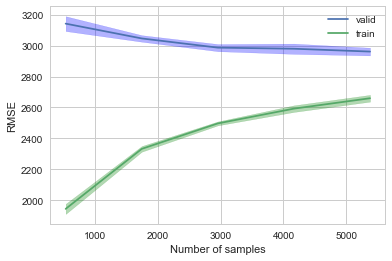

In [125]:
train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()



From the learning curve, it is shown that the RF model with max_depth = 7 and n_estimators = 300 is suffering with a variance problem. We may consider investigating the feature importance to remove some features.

Text(0.5,0,'relative importance')

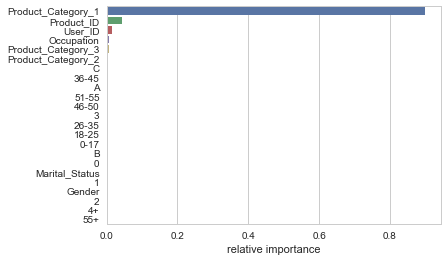

In [126]:
# Feature importance
rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')



This tells that the current model heavily relies on Product_Category_1 (followed by Product_ID and User_ID) to make prediction on Purchase. This was somewhat expected from EDA as they are directly related to the amount of Purchase that the customers make. I interpret this as a strong sign of data leakage. Therefore in Case 2, these suspicious features will be removed in training the second model.

Anyways, this can be trained with the entire dataset available to mitigate the high variance issue and its performance can be evaluated on the test set.


In [127]:
# Utilize the entire dataset for evalution on test set: RMSE
X = df_encoded.drop(['Purchase'], axis=1)
y = df_encoded['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestRegressor(max_depth=7, n_estimators=150).fit(X_train_scaled,y_train)
y_predicted = rf.predict(X_test_scaled)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 2911.177


# ML model (Random Forest) fitting (Case 2):

Data cleaning - removing leackage-causing features & Random sampling and train/test split

In [128]:
df_ocup = pd.get_dummies(df.Occupation)
df_encoded = pd.concat([df_encoded,df_ocup],axis=1)
df_encoded.drop(['Occupation'],axis=1,inplace=True)

In [129]:
df_frac = df_encoded.sample(frac=0.02,random_state=100)
X = df_frac.drop(['Purchase','User_ID','Product_ID','Product_Category_1','Product_Category_2','Product_Category_3'], axis=1)
y = df_frac['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

In [130]:
# Hyperparameter selection through 3-fold cross-validation: RMSE
param_grid = {'n_estimators':[1,3,10,30,100,150,300],'max_depth':[1,3,5,7,9]}
grid_rf = GridSearchCV(RandomForestRegressor(),param_grid,cv=3,scoring='neg_mean_squared_error').fit(X_train,y_train)

In [131]:
print('Best parameter: {}'.format(grid_rf.best_params_))
print('Best score: {:.2f}'.format((-1*grid_rf.best_score_)**0.5))

Best parameter: {'max_depth': 3, 'n_estimators': 300}
Best score: 4936.23


Model investigation by the learning curve

In [132]:
train_sizes, train_scores, valid_scores = learning_curve(RandomForestRegressor(max_depth=3, n_estimators=300), 
                                                         X_train, y_train, cv=3, scoring='neg_mean_squared_error')

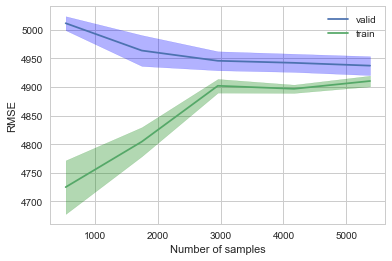

In [133]:
train_scores = (-1*train_scores)**0.5
valid_scores = (-1*valid_scores)**0.5
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.figure()
plt.plot(train_sizes,valid_scores_mean,label='valid')
plt.plot(train_sizes,train_scores_mean,label='train')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3,color="g")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,valid_scores_mean + valid_scores_std, alpha=0.3, color="b")
plt.xlabel('Number of samples')
plt.ylabel('RMSE')
plt.legend()



Considering only the low-level features, now it seems like the model suffers from high bias issue. Knowing that this dataset is artificial, it could possibly be that the given low-level features do not simply have enough predictive power for Purchase

Text(0.5,0,'relative importance')

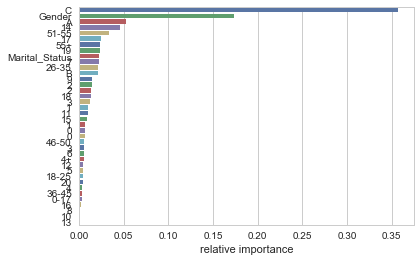

In [134]:
# Feature importance
rf = RandomForestRegressor(max_depth=3, n_estimators=300).fit(X_train,y_train)
f_im = rf.feature_importances_.round(3)
ser_rank = pd.Series(f_im,index=X.columns).sort_values(ascending=False)

plt.figure()
sns.barplot(y=ser_rank.index,x=ser_rank.values,palette='deep')
plt.xlabel('relative importance')

In [135]:
# Evalution on test set: RMSE
y_predicted = rf.predict(X_test)
print('Test set RMSE: {:.3f}'.format(mean_squared_error(y_test,y_predicted)**0.5))

Test set RMSE: 4875.220


From the learning curve, it seems like utilizing more training set would not help much. With 1/50th of the dataset, this model achieves RMSE of ~4876.105 on the test set.

# Conclusion



In this project, the blackfriday dataset has been explored. While EDA revealed some interesting relationships among different features, for the purpose of predicting customer's Purchase, the top three features useful included Product_Category_1, Product_ID and User_ID. With a roughly tuned Random Forest model with max_depth = 9 and n_estimators = 300, the RMSR for predicting Purchase of this model was shown to be ~2911.

However, if the goal is to predict Purchase for the new customer who have never been in the store, those customer-specific and product-specific information cannot be utilized. In this case, only the low-level features can be utilized to train the model. In this case, the model perfornace of the test set was ~4876.

The results are quite dissapointing. However, at the same time, it looks quite reasonable for this synthetically generated dataset where the given low-level features showed to have very weak relationships with the target variable.

For further optimization of the model, the parameters of RF can be tuned more intensively (by exploring more/deeper trees) or other more sophisticated ML models, such as Gradient Boosted Decision Trees and neural network, can be investigated on this dataset to overcome the bias problem.
